# HW2  Regression Fun Time!
## Due Saturday Oct 16th, 2021 at Midnight

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. 

In [1]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
%matplotlib inline


Q1) [10 points] Implement the linear regression model discussed in class below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.


In [2]:
def model(x,w):
    
    # Pad the array with a 1 for the bias term
    ar = np.pad(x, (1, 0), mode="constant", constant_values=(1))

    # Delete the extra row created by the pad
    a = np.delete(ar, [0] ,axis=0)

    # Linear model is multiplying :) 
    return np.matmul(a, w)


assert(list(model(np.expand_dims([1,2,3], 1), [1,2])) == [3, 5, 7])


Q2) [10 ponts] Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [3]:
def least_squares(x,y, *w):
    '''
    w: array of weights
    x,y input arrays
    '''
    # calculate the model
    y_predicted = model(x, w)

    # compute least squares using the y labels
    return sum(((y_p - y_i) ** 2) / len(x) for (y_p, y_i) in zip(y_predicted, y))



assert(least_squares(np.expand_dims([1,2,3], 1), [4,5,9], *[1,2]) == (1 / 3) + (4/3))

Q3) [5 point] This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [16]:
def gradient_descent(g, alpha, max_its, w, x, y, prune=False):
    '''
    The Gradient descent function w/ generic cost function: w^k = w^{k-1} - alpha * grad
    
    g: function(x, y) -> function(w) -> int - cost function
    alpha: float - learning rate
    max_its: int - maximum number of iterations
    w - a vector that is the initialization for the weights
    '''

    gradient = []
    for i in range(0, len(w)):
        # initialize gradient functions for each dimension
        gradient.append(grad(g, i + 2))

    # Return arrays
    cost_history = [g(x, y, *w)]
    weight_history = [w]

    i = 0
    while i < max_its:

        # This corresponds to alpha * gradient(w) term, but now we must calculate it for each parameter to the cost function, 
        # i.e. we must calculate the gradient in each direction.
        sub = np.array([(alpha * gradient[j](x,y, *w)) for j in range(len(w))])

        # This simply speeds things up - to make it so that we don't actually need to perform all the iterations (it is max_iter)
        # without this the code also works fine, it will just not prune...
        if (prune and np.linalg.norm(sub, 2) < 0.01):
            break
        
        # Perform gradient descent subtraction
        w = np.subtract(w, sub)

        # Add our data to our output arrays
        cost_history.append(g(x, y, *w))
        weight_history.append(w)

        i += 1

    return weight_history, cost_history

Q4) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

In [5]:
# import the dataset
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = np.expand_dims(np.log(data[:-1,:])[0], 1)
y = np.log(data[-1:,:])[0]


[]

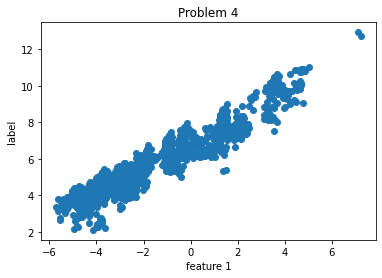

In [7]:
fig, ax = plt.subplots()

ax.scatter(x, y, label=csvname)
ax.set_xlabel("feature 1")
ax.set_ylabel("label")

ax.set_title("Problem 4")

ax.plot()

Q5) [5 points] Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

[]

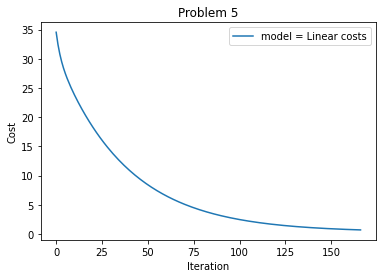

In [8]:
from random import random
w = [random() / 5 - 0.1, random() / 5 - 0.1]

weights, costs = gradient_descent(least_squares, 0.01, 1000, w, x, y, prune=True)

fig, ax = plt.subplots()

ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")
ax.set_title("Problem 5")
ax.plot(costs, label="model = Linear costs")

ax.legend(loc="upper right")


ax.plot()

Q6) [5 points] Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4. 


[]

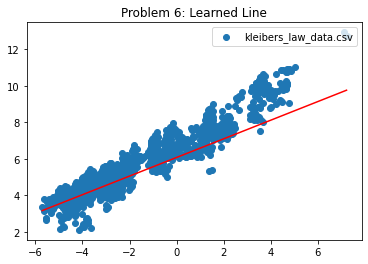

In [10]:
w = weights[-1]

xs = np.linspace(np.min(x),np.max(x))
ys = np.array([w[0] + (w[1] * x) for x in xs])

fig, ax = plt.subplots()

ax.set_title("Problem 6: Learned Line")
ax.plot(xs, ys, color="red")
ax.scatter(x, y, label=csvname)

ax.legend(loc="upper right")


ax.plot()

Q7) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y). 

In [11]:
# load in dataset
csv = "regression_outliers"
data = np.loadtxt(f'{csv}.csv',delimiter = ',')
x = np.expand_dims(data[:-1,:][0], 1)
y = data[-1:,:][0]

[]

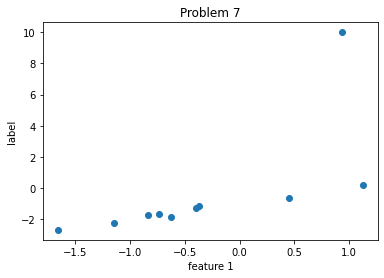

In [12]:
fig, ax = plt.subplots()

ax.scatter(x, y, label=csv)
ax.set_xlabel("feature 1")
ax.set_ylabel("label")

ax.set_title("Problem 7")

ax.plot()

Q8) [10 ponts] Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [13]:
def least_absolute_deviations(x,y, *w):
    '''
    Same parameters as least_squares
    ''' 

    # compute the predicted values using the model
    y_predicted = model(x, w)

    # return the LAD
    return sum(abs(y_p - y_i) / len(x) for (y_p, y_i) in zip(y_predicted, y))
    
assert(least_absolute_deviations(np.expand_dims([1,2,3], 1), [4,5,9], *[1,2]) == (1 / 3) + (2/3))

Q9) [5 points] Use the gradient descent function twice to learn two linear models using the new x and y from Q7 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1) 
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2) 
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


[]

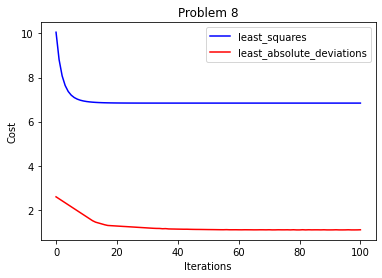

In [17]:
fig, ax = plt.subplots()

least_sq_weights, cost = gradient_descent(least_squares, 0.1, 100, np.array([1.0, 1.0]), x, y)

ax.plot(cost, color="blue", label=least_squares.__name__)

least_abs_weights, cost = gradient_descent(least_absolute_deviations, 0.1, 100, np.array([1.0, 1.0]), x, y)

ax.plot(cost, color="red", label=least_absolute_deviations.__name__)

ax.set_title("Problem 8")
ax.legend(loc="upper right")

ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")

ax.plot()

Q10) [5 points] Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q7. Which of these lines look like a better fit to you? 


[]

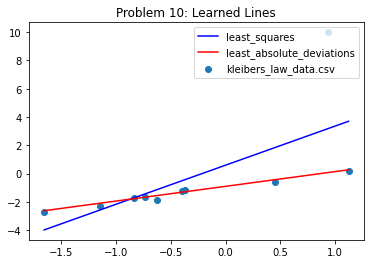

In [24]:
fig, ax = plt.subplots()

# extract xs to plot with
xs = np.expand_dims(np.linspace(np.min(x),np.max(x)), 1)

# ys by the model, using learned weights
ys = model(xs, least_sq_weights[-1])
ax.plot(xs, ys, color="blue", label=least_squares.__name__)

# ys by the model, using learned weights
ys = model(xs, least_abs_weights[-1])
ax.plot(xs, ys, color="red", label=least_absolute_deviations.__name__)


ax.set_title("Problem 10: Learned Lines")

ax.scatter(x, y, label=csvname)

ax.legend(loc="upper right")


ax.plot()

Q11) [6 points] Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [25]:
def MSE(y_actual,y_pred):
    return sum(((y_p - y_i) ** 2) for (y_p, y_i) in zip(y_pred, y_actual))  / len(y_actual) 

def MAD(y_actual,y_pred):
    return sum(abs(y_p - y_i) for (y_p, y_i) in zip(y_pred, y_actual))  / len(y_actual)

Q12) [4 points] Use the functions above to report the MSE and MAD for the two models learned in Q9, using the x and y from Q7. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [28]:
def print_errors(title, x_act, w, mod, y_act):
    y_pred = list(mod(x_act, w))
    print(f"{title}: MSE: {MSE(y_act, y_pred)}; MAD: {MAD(y_act, y_pred)}")

print_errors("Squared", x, least_sq_weights[-1], model, y)
print_errors("ABS", x, least_abs_weights[-1], model, y)

Squared: MSE: 6.84139430066775; MAD: 1.68937055338514
ABS: MSE: 9.86687489854598; MAD: 1.0967019522038102


Answer: It is not clear which model is performing better, as the ABS performs better under MAD, and the Squared performs better under the MSE (obviously because this is what we learned them for). It would appear though that the Absolute value does better by observing the graph - it clearly learns to ignore the one outlier.

Q13) [6 points] Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [29]:
def L2_regularizer(w):
    return np.linalg.norm(w, 2) ** 2

#TEST 
assert(L2_regularizer([1,2,3]) == 14)

def L1_regularizer(w):
    return np.linalg.norm(w, 1)

#TEST 
assert(L1_regularizer([1,2,3]) == 6)

Q14) [12 points] Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q13. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [30]:
def ridge(lam=1):    
    def f(x, y, *w):
        return least_squares(x, y, *w) + (lam * L2_regularizer(w))
    return f

def lasso(lam = 1):    
    def f(x, y, *w):
        return least_squares(x, y, *w) + (lam * L1_regularizer(w))
    return f

# The rest of the questions are for bonus points, but highly recommended

Q15) [2 points] The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [31]:
# load in dataset
import csv
fname = "weatherHistory.csv"
with open(fname) as f:
    reader = csv.reader(f, delimiter=",")

    data = []
    for row in reader:
        data.append(row)

header = data[0]
data = data[1:]

Q16) [5 points] Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [32]:
y = np.array([float(d[3]) for d in data])
x = np.array([[float(x) for x in d[4:9] + [d[10]]] for d in data])

We are now going to using a well-known ML library called sklearn. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split 

This library is very easy to use. We briefly went over it in the class but please use the API and user guide  ( https://scikit-learn.org) to learn exactly how to use this library.

For instance, learning a linear regression model using sklearn can be done in two lines:

linearModel = LinearRegression() 

linearModel.fit(x_train, y_train)

Q17) [2 points] Use the train_test_split to divide your modified data from Q16 into 80% train, 20% test. 

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, test_size=.2)

Q18) [10 points] Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the .predict method can be used to get the y_predictions for the test xs.

In [36]:
from sklearn.metrics import mean_squared_error

def test_run(mod, err):
    model = mod()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    return model, err(y_test, y_pred)

print(f"MSE: {test_run(LinearRegression, mean_squared_error)[1]}")



MSE: 0.8997338375801208


Q19) [10 points] Repeat Q18 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

In [37]:
rid_mod, rid_err = test_run(Ridge, mean_squared_error)

print(f"MSE (Ridge): {rid_err}")

las_mod, las_err = test_run(Lasso, mean_squared_error)

print(f"MSE (Lasso): {las_err}")

MSE (Ridge): 0.899733634963632
MSE (Lasso): 0.9802239669672366


Q20) [4 points] Print the learned parameters for the Ridge and Lasso models (using .coef_).  Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

In [38]:
print(f"Learned Paramters: (Ridge): {rid_mod.coef_}")
print(f"Learned Paramters: (Lasso): {las_mod.coef_}")

Learned Paramters: (Ridge): [ 8.72422919e-01 -1.42434355e+00  7.94997053e-02 -4.11869639e-04
  8.55237029e-03 -1.91243806e-04]
Learned Paramters: (Lasso): [ 8.80220686e-01 -0.00000000e+00  6.88053993e-02 -2.66224596e-04
  0.00000000e+00 -1.42008417e-04]


The difference is that the lasso parameters are smaller - because we place higher importance on smaller weights so we work harder to minimize them.  We can see that the Lasso algorithm eliminates the weight for humidity and for visibility - indicating to us that there are less important! Pretty cool. 

I decided to run similar learning on my learning algorithms - because they should also be able to compute on more parameters - but there was way too much data. With a bit more time - I would have written a version that samples the data.

In [39]:

from random import random
w = [random() / 5 - 0.1 for i in range(7)]

# I'm getting an error here with the sqrt functionality.
weights, costs = gradient_descent(lasso(), 0.01, 1, w, x, y)
print(weights[-1])

KeyboardInterrupt: 

Turns out the data set is SO big that my algorithm is too slow. Very sad.
